<a href="https://colab.research.google.com/github/OlgaPriyutova/Feature-Importance-and-Feature-Engineering-/blob/main/Feature_Importance_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I this project I generated data set (n-class classification problem) with 7 important and 8 idle features,
# and check how different algorithms will work on this data and how we can improve accuracy of prediction using feature elimination (RFE) and feature enginnering (PCA).  

In [2]:
import sklearn
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [4]:

# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=2500, n_features=25, n_informative=5, n_redundant=20, random_state=42)
# summarize the dataset
print(X.shape, y.shape)
X

(2500, 25) (2500,)


array([[ 0.5414294 , -4.31889678, -1.64297395, ..., -0.67811276,
         1.36986999, -0.38643914],
       [-0.17796707,  0.09208261, -2.12433543, ..., -2.67262611,
         2.40519181,  0.70349141],
       [-0.27458008, -0.05337614, -0.98756685, ..., -1.13420832,
         1.13967914,  0.4537936 ],
       ...,
       [ 2.25838355, -6.18457501, -4.25267157, ..., -2.32351937,
         0.46688057, -2.87282394],
       [ 1.68106914, -4.14903841, -2.5576038 , ..., -1.19227456,
        -0.31552008, -1.66221388],
       [ 3.28688984,  3.70065743, -0.27279654, ..., -2.12470172,
        -2.27966324, -0.79746161]])

In [5]:
X_df=pd.DataFrame(X)
X_df.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.541429,-4.318897,-1.642974,1.968950,0.717840,-2.295741,-2.104132,0.814007,1.033471,-0.065134,...,-0.439019,3.476117,2.056304,-0.730376,-1.805060,-2.163203,-1.233533,-0.678113,1.369870,-0.386439
1,-0.177967,0.092083,-2.124335,0.192293,-3.826816,-3.248624,1.051480,-1.751444,-1.710400,-0.777456,...,-2.319364,-1.035908,1.826485,0.473686,1.396610,0.064954,4.857308,-2.672626,2.405192,0.703491
2,-0.274580,-0.053376,-0.987567,0.268126,-2.069771,-1.700350,0.623295,-0.755680,-0.389871,-0.432745,...,-1.375098,-0.841344,1.242397,0.004372,0.641676,0.472366,2.364901,-1.134208,1.139679,0.453794
3,0.832124,1.405680,1.410918,0.265231,1.252379,3.724558,2.613919,2.436666,2.895963,1.091979,...,-3.357955,-2.725468,0.833801,0.729923,0.588687,2.545437,-1.404721,0.448694,-1.174087,1.798778
4,-0.500918,0.601602,1.034556,0.881965,0.242648,1.908764,2.468599,0.445472,1.223199,-0.545992,...,-1.284102,-1.639133,0.662858,1.119846,1.563552,-0.222558,-0.376512,0.114510,1.275707,1.819704


In [6]:
y

array([0, 1, 1, ..., 0, 0, 1])

Linear Regression, Decition Tree do not give us prediction with higher than 49% accuracy, with any number or combination of features, so these algorithms just do not work on this dataset. So, let us start with Logistic Regression
# Logistic Regression Feature Importance and Feature Engineering

Feature: 0, Score: -0.15382
Feature: 1, Score: 0.20392
Feature: 2, Score: 0.14067
Feature: 3, Score: -0.05478
Feature: 4, Score: -0.01900
Feature: 5, Score: 0.10719
Feature: 6, Score: 0.14201
Feature: 7, Score: -0.19060
Feature: 8, Score: -0.18133
Feature: 9, Score: -0.14305
Feature: 10, Score: 0.06808
Feature: 11, Score: -0.03769
Feature: 12, Score: -0.03745
Feature: 13, Score: -0.17843
Feature: 14, Score: 0.23256
Feature: 15, Score: 0.26979
Feature: 16, Score: -0.09491
Feature: 17, Score: -0.19722
Feature: 18, Score: 0.11669
Feature: 19, Score: 0.21039
Feature: 20, Score: -0.17753
Feature: 21, Score: 0.03830
Feature: 22, Score: 0.06686
Feature: 23, Score: 0.12681
Feature: 24, Score: 0.04647


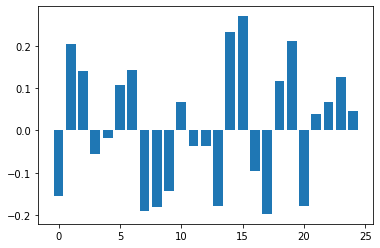

In [7]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model_lg = LogisticRegression()
# fit the model
model_lg.fit(X, y)
# get importance
importance = model_lg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [8]:
cross_val_score(model_lg, X,y).mean()


0.8263999999999999

In [9]:
# Check how many feachures we need for the highest accuracy: 


X=pd.DataFrame(X)
features = list(range(2,26))
mean_accuracy = []

for i in features:
  pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=i)),
                     ('log_reg', LogisticRegression(random_state=0))])
  
  
  pipe.fit(X,y)

  scores = cross_val_score(pipe, X_df, y, cv=5)
  
  mean_accuracy.append(scores.mean())

print(mean_accuracy)



[0.7888, 0.8268000000000001, 0.8288, 0.8276, 0.8256, 0.8268000000000001, 0.8268000000000001, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999, 0.8263999999999999]


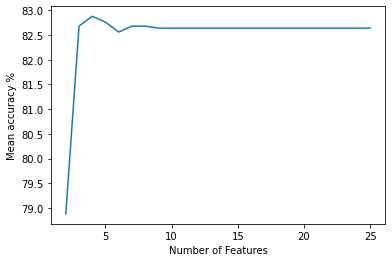

In [10]:

k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

In [11]:
# 5 features (out of 7 of importance) are enough for this model according to this picture. Let is try to Scale it and chose only 5 fratures: 

In [12]:
pipe5     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                     ('log_reg', LogisticRegression(random_state=42))])
pipe5.fit(X,y)

scores5 = cross_val_score(pipe5, X, y, cv=5)
print(scores5.mean())

0.8276


In [13]:
#Let us check which features are important and apply them directly: 

In [14]:
Feature_support = pd.DataFrame(pipe5.named_steps['rfe'].support_, index=X.columns)
Feature_support.rename({0:'Feature Support'}, axis=1, inplace=True)
Feature_support = Feature_support.sort_values(by=['Feature Support'], ascending=False)
print(Feature_support)

    Feature Support
20             True
19             True
15             True
14             True
1              True
0             False
13            False
23            False
22            False
21            False
18            False
17            False
16            False
12            False
11            False
10            False
9             False
8             False
7             False
6             False
5             False
4             False
3             False
2             False
24            False


In [15]:
X_f = X[[12,3,7,10,17]]
X_f.head(3)

,12,3,7,10,17
0,-2.738644,1.968950,0.814007,-0.877920,2.056304
1,2.079590,0.192293,-1.751444,-4.476054,1.826485
2,1.281471,0.268126,-0.755680,-2.455179,1.242397


In [16]:
pipe_f     = Pipeline([('scaler', StandardScaler()), 
                     ('log_reg', LogisticRegression())])

# fit the model
pipe_f.fit(X_f, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [17]:
pipe_f.predict(X_f)

array([0, 1, 0, ..., 0, 0, 1])

In [18]:
score = cross_val_score(pipe_f, X_f, y).mean()
print(score)

0.8132000000000001


In [19]:
pca = PCA(0.999)
pca.fit(X)

X_components = pca.transform(X)

model_lg.fit(X_components,y)
print('Before Feature Engineering:', cross_val_score(model_lg, X,y).mean())
print('After Feature Engineering:', cross_val_score(pipe_f, X_components,y).mean())

Before Feature Engineering: 0.8263999999999999
After Feature Engineering: 0.8263999999999999


In [20]:
# We increase accuracy from 0.842 to 0.8426

# Random Forest (Classification model) Feature Importnace

Feature: 0, Score: 0.09094
Feature: 1, Score: 0.03260
Feature: 2, Score: 0.03358
Feature: 3, Score: 0.01887
Feature: 4, Score: 0.01253
Feature: 5, Score: 0.01432
Feature: 6, Score: 0.03264
Feature: 7, Score: 0.02126
Feature: 8, Score: 0.02699
Feature: 9, Score: 0.05438
Feature: 10, Score: 0.01248
Feature: 11, Score: 0.01097
Feature: 12, Score: 0.01789
Feature: 13, Score: 0.05551
Feature: 14, Score: 0.09685
Feature: 15, Score: 0.05126
Feature: 16, Score: 0.03113
Feature: 17, Score: 0.02655
Feature: 18, Score: 0.07066
Feature: 19, Score: 0.11367
Feature: 20, Score: 0.08944
Feature: 21, Score: 0.01403
Feature: 22, Score: 0.02899
Feature: 23, Score: 0.01468
Feature: 24, Score: 0.02778


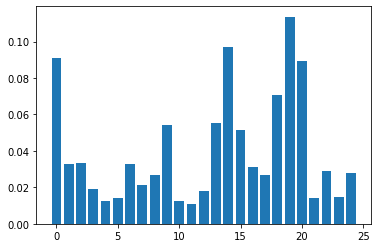

In [25]:
from sklearn.ensemble import RandomForestClassifier
# random forest for feature importance on a regression problem


# define the model
model_rf = RandomForestClassifier()
# fit the model
model_rf.fit(X, y)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [26]:
model_rf.predict(X)

array([0, 1, 1, ..., 0, 0, 1])

In [27]:
cross_val_score(model_rf, X,y).mean()

0.9148

In [28]:
pca = PCA(0.999)
pca.fit(X)

X_components = pca.transform(X)
mod_rf = RandomForestClassifier()
mod_rf.fit(X_components,y)
cross_val_score(mod_rf, X_components,y).mean()

0.9048

In [29]:
# Implementation Feature Engineering improves accuracy in 0.003 %

# Random Forest (classification) Feature Importance

Feature: 0, Score: 0.10448
Feature: 1, Score: 0.03092
Feature: 2, Score: 0.03874
Feature: 3, Score: 0.02086
Feature: 4, Score: 0.01252
Feature: 5, Score: 0.01641
Feature: 6, Score: 0.03144
Feature: 7, Score: 0.02658
Feature: 8, Score: 0.02874
Feature: 9, Score: 0.05243
Feature: 10, Score: 0.01263
Feature: 11, Score: 0.01120
Feature: 12, Score: 0.02290
Feature: 13, Score: 0.04449
Feature: 14, Score: 0.08711
Feature: 15, Score: 0.04536
Feature: 16, Score: 0.03069
Feature: 17, Score: 0.03211
Feature: 18, Score: 0.07450
Feature: 19, Score: 0.10795
Feature: 20, Score: 0.08089
Feature: 21, Score: 0.01439
Feature: 22, Score: 0.02562
Feature: 23, Score: 0.01700
Feature: 24, Score: 0.03003


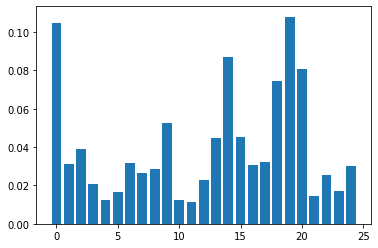

In [30]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

model_rfc = RandomForestClassifier(random_state=42)
# fit the model
model_rfc.fit(X, y)
# get importance
importance = model_rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
cross_val_score(model_rfc,X,y).mean()

0.9136000000000001

In [32]:
pca = PCA(0.9999)
pca.fit(X)

X_components = pca.transform(X)
mod_rfc = RandomForestClassifier(random_state=42)
mod_rfc.fit(X_components,y)
cross_val_score(model_rfc, X_components,y).mean()

0.9064

In [33]:
features = list(range(2,26))
mean_accuracy = []

for i in features:
  pipe_rfc     = Pipeline([('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=i)),
                     ('mod_rfc', RandomForestClassifier(random_state=42))])

  pipe_rfc.fit(X, y)

  scores = cross_val_score(pipe_rfc, X, y, cv=5)
  mean_accuracy.append(scores.mean())

print(mean_accuracy)



[0.8343999999999999, 0.8728, 0.8859999999999999, 0.8964000000000001, 0.9039999999999999, 0.9067999999999999, 0.9072000000000001, 0.9068000000000002, 0.9084, 0.9099999999999999, 0.9092, 0.9144, 0.9128000000000001, 0.9136000000000001, 0.9132, 0.914, 0.9148, 0.916, 0.9148000000000002, 0.9164000000000001, 0.9192, 0.9152000000000001, 0.916, 0.9136000000000001]


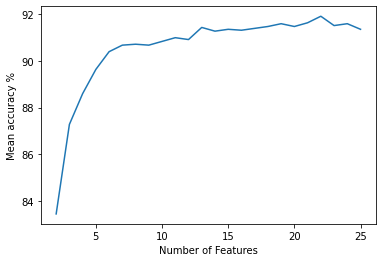

In [34]:
k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

In [35]:
pipe_rfc13     = Pipeline([('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=13)),
                     ('mod_rfc', RandomForestClassifier(random_state=42))])

pipe_rfc13.fit(X, y)
cross_val_score(pipe_rfc13,X,y).mean()

0.9144

In [36]:
# Implementation Feature Engineering for Random Forest algorithm doesn't give us any improvement. 

# Permutation Feature Importance with KNN for Classification Model

Feature: 0, Score: 0.01176
Feature: 1, Score: 0.00664
Feature: 2, Score: -0.00120
Feature: 3, Score: -0.00016
Feature: 4, Score: -0.00008
Feature: 5, Score: 0.01768
Feature: 6, Score: 0.00608
Feature: 7, Score: 0.00072
Feature: 8, Score: 0.01328
Feature: 9, Score: -0.00048
Feature: 10, Score: 0.00240
Feature: 11, Score: -0.00096
Feature: 12, Score: -0.00064
Feature: 13, Score: 0.00256
Feature: 14, Score: 0.00768
Feature: 15, Score: 0.03000
Feature: 16, Score: 0.01144
Feature: 17, Score: 0.00304
Feature: 18, Score: 0.00232
Feature: 19, Score: 0.00240
Feature: 20, Score: 0.01664
Feature: 21, Score: -0.00016
Feature: 22, Score: 0.00336
Feature: 23, Score: 0.00528
Feature: 24, Score: -0.00048


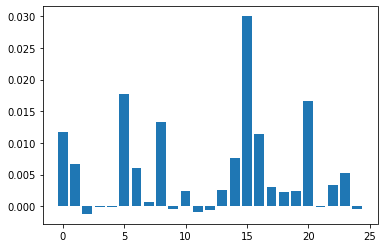

In [37]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model_knnc = KNeighborsClassifier()
# fit the model
model_knnc.fit(X, y)
# perform permutation importance
results = permutation_importance(model_knnc, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Permutation feature Importance 

In [38]:
cross_val_score(model_knnc,X,y).mean()

0.9036

In [39]:
model_knnc.predict(X_df)

array([0, 1, 1, ..., 0, 0, 1])

In [40]:
pca = PCA(0.99999)
pca.fit(X)

X_components = pca.transform(X)
model_knnc.fit(X_components,y)
print(cross_val_score(model_knnc, X,y).mean())
print(cross_val_score(model_knnc, X_components,y).mean())

0.9036
0.9036


In [41]:
# Using PCA on KNN Classifier does not change the accuracy at all. 

In [42]:
###################################################################
###### Xgboost Classification in Python #######
import pandas as pd
from xgboost import XGBClassifier
model_XGBC =XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(model_XGBC)
 
#Creating the model on Training Data
XGBC=model_XGBC.fit(X,y)
prediction=XGBC.predict(X)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y, prediction))
print(metrics.confusion_matrix(y, prediction))
 

XGBClassifier(n_estimators=500)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1256
           1       1.00      1.00      1.00      1244

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1253    3]
 [   0 1244]]


In [43]:
pca = PCA(0.99999)
pca.fit(X)

X_components = pca.transform(X)
model_XGBC.fit(X_components,y)
print(cross_val_score(XGBC, X,y).mean())
print(cross_val_score(model_XGBC, X_components,y).mean())

0.9148
0.8912000000000001


In [44]:
# Summary:  
# LogisticRegression: Application of Recursive Feature Elimination (RFE) gave insignificant improvement, but Principal Component Analisys doen't help to improve the prediction.
# KNN Regression and Random Forest: application of feature engineering doen't changed the result of prediction. 
# Inplementation feature enginiring for XB BOOST Classifier improve accuracy in 0.002% 
# XGBoost: application of PCA (Principal Component Analysis) even decreased accuracy form 91 to 89 %. 
